In [2]:
#package et chargement fichiers

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
demo = pd.read_csv("D:/git-projets/Depression-analysis/Demographic_symptom.csv", index_col = 0)


nettoyage des données

In [4]:


"""
intervalle de score attendus :

shaps : 14 à 56
psqi 0 à 21
madrs : 0 à 60
hamd 17 : 0 à 52
hamd 21 : 0 à 60
ham-a : 0 à 56
poms-tension : 0à 36
poms-depression : 0 à 60
poms-agressivité : 0 à48 
poms-fatigue : 0 à 28
poms-relation-pers : 0 à 28
poms-confusion : 0 à 28
poms-vigueur : 0 à 32
poms-total : -32 à 68
qids_sleep_score : 0 à 3
qids_appetite_score : 0 à 3
qids_psychomotor_score : 0 à 3
qids_total : 0 à 27

"""
#exploration
#afficher le détail du df
print(demo.head)
print(demo.info())


<bound method NDFrame.head of       batch   age     sex Diag  \
AA003   1st  45.0  Female   HC   
AA101   3rd  26.0  Female   HC   
AA115   1st  44.0  Female   HC   
AA296   2nd  27.0    Male   HC   
AA328   1st  51.0    Male  MDD   
...     ...   ...     ...  ...   
AN466   4th  28.0    Male  MDD   
AN736   4th  22.0  Female  MDD   
AN965   4th  29.0    Male  MDD   
AO427   4th  26.0    Male  MDD   
AO507   4th  23.0    Male  MDD   

                                     PrimaryDiagnosis  hs-CRP  shaps_score  \
AA003                      Healthy_Control,_High_Risk    0.40         25.0   
AA101                                 Healthy_Control     NaN         15.0   
AA115                                 Healthy_Control    6.90         16.0   
AA296                                 Healthy_Control    0.60         14.0   
AA328  Major_Depressive_Disorder,_Recurrent,_Moderate    1.60         24.0   
...                                               ...     ...          ...   
AN466          

In [5]:
#redéfinir le nom de la colonne hs-CRP
demo.rename(columns={'hs-CRP': 'hs_CRP'}, inplace=True)


In [6]:

#filtre des valeurs abberrantes

shaps_filter = (demo.shaps_score >= 14) & (demo.shaps_score <= 56)
psqi_filter = demo.psqi_score <= 21
madrs_filter = demo.madrs_score <= 60
hamd17_filter = demo.hamd_hamd17_score <= 52
hamd21_filter = demo.hamd_hamd21_score <= 60
hama_filter = demo.hama_score <= 56
poms_filter_tension = demo.poms_score_tension <= 36
poms_filter_depression = demo.poms_score_depression <= 60
poms_filter_anger = demo.poms_score_anger <= 48
poms_filter_fatigue = demo.poms_score_fatigue <= 28
poms_filter_friendliness = demo.poms_score_friendliness<=28
poms_filter_confusion = demo.poms_score_confusion <= 28
poms_filter_vigour = demo.poms_score_vigour <= 32
poms_filter_tmd = (demo.poms_score_tmd >= -32) & (demo.poms_score_tmd <= 168)
qids_sleep_filter = demo.qids_sleep_score <= 3
qids_appetite_filter = demo.qids_appetite_score <= 3
qids_psychomotor_filter = demo.qids_psychomotor_score <= 3
qids_filter = demo.qids_score <= 27
MADRS_Q1_filter = (demo.MADRS_Q1 >= 0) & (demo.MADRS_Q1 <= 6)
MADRS_Q2_filter = (demo.MADRS_Q2 >= 0) & (demo.MADRS_Q2 <= 6)
MADRS_Q3_filter = (demo.MADRS_Q3 >= 0) & (demo.MADRS_Q3 <= 6)
MADRS_Q4_filter = (demo.MADRS_Q4 >= 0) & (demo.MADRS_Q4 <= 6)
MADRS_Q5_filter = (demo.MADRS_Q5 >= 0) & (demo.MADRS_Q5 <= 6)
MADRS_Q6_filter = (demo.MADRS_Q6 >= 0) & (demo.MADRS_Q6 <= 6)
MADRS_Q7_filter = (demo.MADRS_Q7 >= 0) & (demo.MADRS_Q7 <= 6)
MADRS_Q8_filter = (demo.MADRS_Q8 >= 0) & (demo.MADRS_Q8 <= 6)
MADRS_Q9_filter = (demo.MADRS_Q9 >= 0) & (demo.MADRS_Q9 <= 6)
MADRS_Q10_filter = (demo.MADRS_Q10 >= 0) & (demo.MADRS_Q10 <= 6)

all_filter_abber = shaps_filter & psqi_filter & madrs_filter & hamd17_filter & hamd21_filter & hama_filter & poms_filter_tension & poms_filter_depression & poms_filter_anger & poms_filter_fatigue & poms_filter_friendliness & poms_filter_confusion & poms_filter_vigour & poms_filter_tmd & qids_sleep_filter & qids_appetite_filter & qids_psychomotor_filter & qids_filter & MADRS_Q1_filter & MADRS_Q2_filter & MADRS_Q3_filter & MADRS_Q4_filter & MADRS_Q5_filter & MADRS_Q6_filter & MADRS_Q7_filter & MADRS_Q8_filter & MADRS_Q9_filter & MADRS_Q10_filter



In [7]:
#suppression des valeurs manquantes
nna_hs_CRP = demo.hs_CRP.notna()
shaps_nna = demo.shaps_score.notna()
psqi_nna = demo.psqi_score.notna()
madrs_nna = demo.madrs_score.notna()
hamd17_nna = demo.hamd_hamd17_score.notna()
hamd21_nna = demo.hamd_hamd21_score.notna()
hama_nna = demo.hama_score.notna()
poms_nna_tension = demo.poms_score_tension.notna()
poms_nna_depression = demo.poms_score_depression.notna()
poms_nna_anger = demo.poms_score_anger.notna()
poms_nna_fatigue = demo.poms_score_fatigue.notna()
poms_nna_friendliness = demo.poms_score_friendliness.notna()
poms_nna_confusion = demo.poms_score_confusion.notna()
poms_nna_vigour = demo.poms_score_vigour.notna()
poms_nna_tmd = demo.poms_score_tmd.notna()
qids_nna_psychomotor = demo.qids_psychomotor_score.notna()
qids_nna_sleep = demo.qids_sleep_score.notna()
qids_nna_appetite = demo.qids_appetite_score.notna()
qids_nna = demo.qids_score.notna()
MADRS_Q1_nna = demo.MADRS_Q1.notna()
MADRS_Q2_nna = demo.MADRS_Q2.notna()
MADRS_Q3_nna = demo.MADRS_Q3.notna()
MADRS_Q4_nna = demo.MADRS_Q4.notna()
MADRS_Q5_nna = demo.MADRS_Q5.notna()
MADRS_Q6_nna = demo.MADRS_Q6.notna()
MADRS_Q7_nna= demo.MADRS_Q7.notna()
MADRS_Q8_nna = demo.MADRS_Q8.notna()
MADRS_Q9_nna = demo.MADRS_Q9.notna()
MADRS_Q10_nna = demo.MADRS_Q10.notna()
ctq_denial_nna = demo.ctq_denial_score.notna()
ctq_emoabuse_nna = demo.ctq_emoabuse_score.notna()
ctq_emoneglect_nna = demo.ctq_emoneglect_score.notna()
ctq_physabuse_nna = demo.ctq_physabuse_score.notna()
ctq_physneglect_nna = demo.ctq_physneglect_score.notna()
ctq_sexabuse_nna = demo.ctq_sexabuse_score.notna()
ctq_score_nna = demo.ctq_score.notna()
tci_coop_nna = demo.tci_coop_score.notna()
tci_harmavoid_nna = demo.tci_harmavoid_score.notna()
tci_noveltyseek_nna = demo.tci_noveltyseek_score.notna()
tci_persistence_nna = demo.tci_persistence_score.notna()
tci_rewarddep_nna = demo.tci_rewarddep_score.notna()
tci_selfdirect_nna = demo.tci_selfdirect_score.notna()
tci_selftranscend_nna = demo.tci_selftranscend_score.notna()
tci_impulsivity_nna = demo.tci_impulsivity_score.notna()
PrimaryDiagnosis_nna = demo.PrimaryDiagnosis.notna()

all_nna_spd = nna_hs_CRP & shaps_nna & psqi_nna & madrs_nna & hamd17_nna & hamd21_nna & hama_nna & poms_nna_tension & poms_nna_depression & poms_nna_anger & poms_nna_fatigue & poms_nna_friendliness& poms_nna_confusion & poms_nna_vigour  & poms_nna_tmd & qids_nna_psychomotor & qids_nna_sleep & qids_nna_appetite & qids_nna & MADRS_Q1_nna & MADRS_Q2_nna & MADRS_Q3_nna & MADRS_Q4_nna & MADRS_Q5_nna & MADRS_Q6_nna & MADRS_Q7_nna & MADRS_Q8_nna & MADRS_Q9_nna & MADRS_Q10_nna & ctq_denial_nna & ctq_emoabuse_nna & ctq_emoneglect_nna & ctq_physabuse_nna & ctq_physneglect_nna & ctq_sexabuse_nna & ctq_score_nna & tci_coop_nna & tci_harmavoid_nna & tci_noveltyseek_nna & tci_persistence_nna & tci_rewarddep_nna & tci_selfdirect_nna & tci_selftranscend_nna & tci_impulsivity_nna
all_nna_pd = nna_hs_CRP & shaps_nna & psqi_nna & madrs_nna & hamd17_nna & hamd21_nna & hama_nna & poms_nna_tension & poms_nna_depression & poms_nna_anger & poms_nna_fatigue & poms_nna_friendliness& poms_nna_confusion & poms_nna_vigour  & poms_nna_tmd & qids_nna_psychomotor & qids_nna_sleep & qids_nna_appetite & qids_nna & MADRS_Q1_nna & MADRS_Q2_nna & MADRS_Q3_nna & MADRS_Q4_nna & MADRS_Q5_nna & MADRS_Q6_nna & MADRS_Q7_nna & MADRS_Q8_nna & MADRS_Q9_nna & MADRS_Q10_nna & ctq_denial_nna & ctq_emoabuse_nna & ctq_emoneglect_nna & ctq_physabuse_nna & ctq_physneglect_nna & ctq_sexabuse_nna & ctq_score_nna & tci_coop_nna & tci_harmavoid_nna & tci_noveltyseek_nna & tci_persistence_nna & tci_rewarddep_nna & tci_selfdirect_nna & tci_selftranscend_nna & tci_impulsivity_nna & PrimaryDiagnosis_nna


In [8]:
#création des dataset spd et pd
all_filter_spd = all_nna_spd & all_filter_abber
all_filter_pd = all_nna_pd & all_filter_abber

demo_net_spd = demo[all_filter_spd]
demo_net_pd = demo[all_filter_pd]

demo_net_spd = demo_net_spd.drop(["PrimaryDiagnosis"], axis=1)
demo_net_spd.info()
demo_net_pd.info()


<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, AA003 to AN965
Data columns (total 48 columns):
batch                      123 non-null object
age                        123 non-null float64
sex                        123 non-null object
Diag                       123 non-null object
hs_CRP                     123 non-null float64
shaps_score                123 non-null float64
psqi_score                 123 non-null float64
ctq_denial_score           123 non-null float64
ctq_emoabuse_score         123 non-null float64
ctq_emoneglect_score       123 non-null float64
ctq_physabuse_score        123 non-null float64
ctq_physneglect_score      123 non-null float64
ctq_sexabuse_score         123 non-null float64
ctq_score                  123 non-null float64
madrs_score                123 non-null float64
hamd_hamd17_score          123 non-null float64
hamd_hamd21_score          123 non-null float64
hama_score                 123 non-null float64
poms_score_tension         123 no

ANALYSE DE DONNEES

STAT A PARTIR DU DATASET SANS PRIMARY DIAGNOSIS

In [10]:
#create crosstab sex diag
t = pd.crosstab(demo_net_spd.Diag, "freq")
s = pd.crosstab(demo_net_spd.sex, "freq")
print(t)
print(s)


col_0  freq
Diag       
HC       74
MDD      49
col_0   freq
sex         
Female    67
Male      56


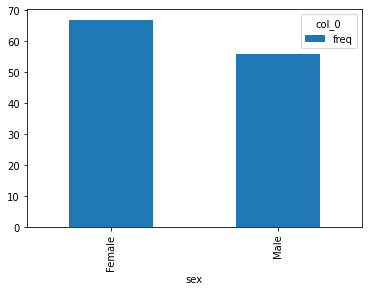

In [11]:

# Create bar diag of Diag and sex
s.plot.bar()
plt.show()


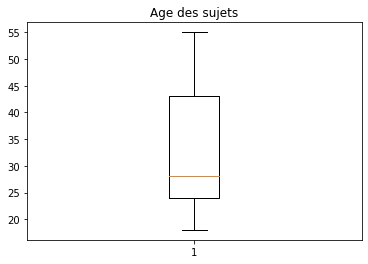

In [12]:
plt.boxplot(demo_net_spd.age)
plt.title('Age des sujets')
plt.show()


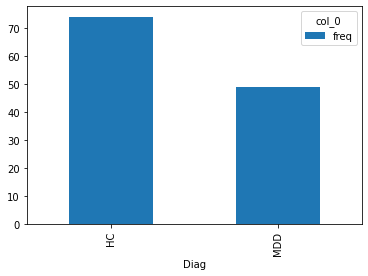

In [13]:

t.plot.bar()
plt.show()


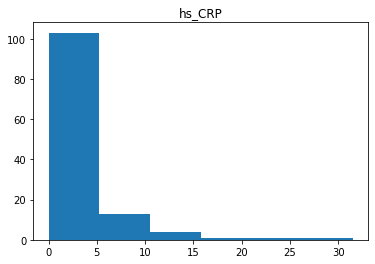

In [14]:

plt.hist(demo_net_spd.hs_CRP, bins = 6)
plt.title("hs_CRP")
plt.show()

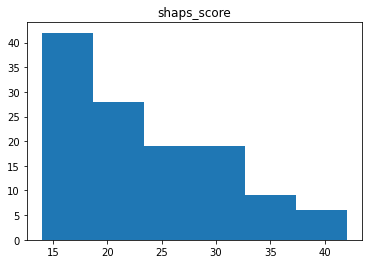

In [15]:

plt.hist(demo_net_spd.shaps_score, bins = 6)
plt.title("shaps_score")
plt.show()

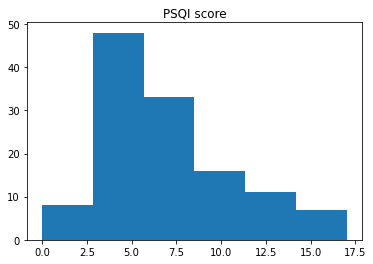

In [16]:

plt.hist(demo_net_spd.psqi_score, bins=6)
plt.title('PSQI score')
plt.show()

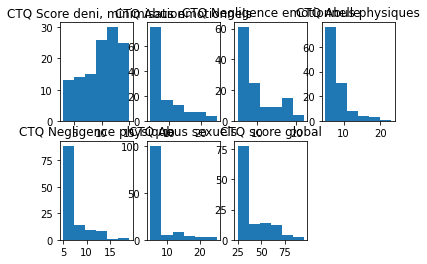

In [17]:

fig1 = plt.figure()
ax11 = fig1.add_subplot(2,4,1)
ax21 = fig1.add_subplot(2,4,2)
ax31 = fig1.add_subplot(2,4,3)
ax41 = fig1.add_subplot(2,4,4)
ax51 = fig1.add_subplot(2,4,5)
ax61 = fig1.add_subplot(2,4,6)
ax71 = fig1.add_subplot(2,4,7)
ax11.title.set_text('CTQ Score deni, minimisation')
ax21.title.set_text('CTQ Abus emotionnels')
ax31.title.set_text('CTQ Negligence emotionnelle')
ax41.title.set_text('CTQ Abus physiques')
ax51.title.set_text('CTQ Negligence physique')
ax61.title.set_text('CTQ Abus sexuels')
ax71.title.set_text('CTQ score global')
ax11.hist(demo_net_spd.ctq_denial_score,bins = 6)
ax21.hist(demo_net_spd.ctq_emoabuse_score,bins = 6)
ax31.hist(demo_net_spd.ctq_emoneglect_score,bins = 6)
ax41.hist(demo_net_spd.ctq_physabuse_score,bins = 6)
ax51.hist(demo_net_spd.ctq_physneglect_score,bins = 6)
ax61.hist(demo_net_spd.ctq_sexabuse_score,bins = 6)
ax71.hist(demo_net_spd.ctq_score,bins = 6)
plt.show()

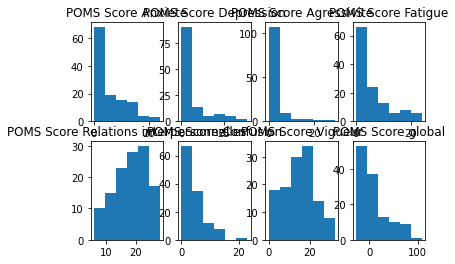

In [18]:

fig3 = plt.figure()
ax12 = fig3.add_subplot(2,4,1)
ax22 = fig3.add_subplot(2,4,2)
ax32 = fig3.add_subplot(2,4,3)
ax42 = fig3.add_subplot(2,4,4)
ax52 = fig3.add_subplot(2,4,5)
ax62 = fig3.add_subplot(2,4,6)
ax72 = fig3.add_subplot(2,4,7)
ax82 = fig3.add_subplot(2,4,8)
ax12.title.set_text('POMS Score Anxiete')
ax22.title.set_text('POMS Score Depression')
ax32.title.set_text('POMS Score Agressivite')
ax42.title.set_text('POMS Score Fatigue')
ax52.title.set_text('POMS Score Relations interpersonnelles')
ax62.title.set_text('POMS Score Confusion')
ax72.title.set_text('POMS Score Vigueur')
ax82.title.set_text('POMS Score global')
ax12.hist(demo_net_spd.poms_score_tension,bins = 6)
ax22.hist(demo_net_spd.poms_score_depression,bins = 6)
ax32.hist(demo_net_spd.poms_score_anger,bins = 6)
ax42.hist(demo_net_spd.poms_score_fatigue,bins = 6)
ax52.hist(demo_net_spd.poms_score_friendliness,bins = 6)
ax62.hist(demo_net_spd.poms_score_confusion,bins = 6)
ax72.hist(demo_net_spd.poms_score_vigour,bins = 6)
ax82.hist(demo_net_spd.poms_score_tmd,bins = 6)
plt.show()

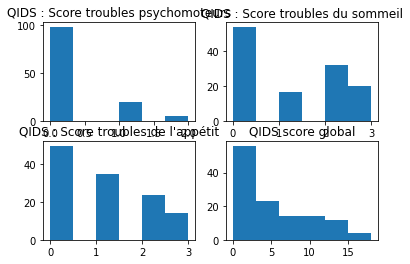

In [19]:
fig2 = plt.figure()
ax10 = fig2.add_subplot(2,2,1)
ax20 = fig2.add_subplot(2,2,2)
ax30 = fig2.add_subplot(2,2,3)
ax40 = fig2.add_subplot(2,2,4)
ax10.title.set_text('QIDS : Score troubles psychomoteurs')
ax20.title.set_text('QIDS : Score troubles du sommeil')
ax30.title.set_text("QIDS : Score troubles de l'appétit")
ax40.title.set_text('QIDS score global')
ax10.hist(demo_net_spd.qids_psychomotor_score,bins = 6)
ax20.hist(demo_net_spd.qids_sleep_score,bins = 6)
ax30.hist(demo_net_spd.qids_appetite_score,bins = 6)
ax40.hist(demo_net_spd.qids_score,bins = 6)
plt.show()

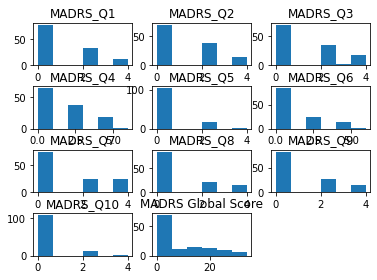

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(4,3,1)
ax2 = fig.add_subplot(4,3,2)
ax3 = fig.add_subplot(4,3,3)
ax4 = fig.add_subplot(4,3,4)
ax5 = fig.add_subplot(4,3,5)
ax6 = fig.add_subplot(4,3,6)
ax7 = fig.add_subplot(4,3,7)
ax8 = fig.add_subplot(4,3,8)
ax9 = fig.add_subplot(4,3,9)
ax10 = fig.add_subplot(4,3,10)
ax1.title.set_text('MADRS_Q1')
ax2.title.set_text('MADRS_Q2')
ax3.title.set_text('MADRS_Q3')
ax4.title.set_text('MADRS_Q4')
ax5.title.set_text('MADRS_Q5')
ax6.title.set_text('MADRS_Q6')
ax7.title.set_text('MADRS_Q7')
ax8.title.set_text('MADRS_Q8')
ax9.title.set_text('MADRS_Q9')
ax10.title.set_text('MADRS_Q10')
ax1.hist(demo_net_spd.MADRS_Q1,bins = 6)
ax2.hist(demo_net_spd.MADRS_Q2,bins = 6)
ax3.hist(demo_net_spd.MADRS_Q3,bins = 6)
ax4.hist(demo_net_spd.MADRS_Q4,bins = 6)
ax5.hist(demo_net_spd.MADRS_Q5,bins = 6)
ax6.hist(demo_net_spd.MADRS_Q6,bins = 6)
ax7.hist(demo_net_spd.MADRS_Q7,bins = 6)
ax8.hist(demo_net_spd.MADRS_Q8,bins = 6)
ax9.hist(demo_net_spd.MADRS_Q9,bins = 6)
ax10.hist(demo_net_spd.MADRS_Q10,bins = 6)
ax11 = fig.add_subplot(4,3,11)
ax11.title.set_text('MADRS Global Score')
ax11.hist(demo_net_spd.madrs_score, bins=6)
fig.subplots_adjust(left=0.12, bottom=0.11, right=0.90, top=0.92, wspace=0.2, hspace=0.5)
plt.show()

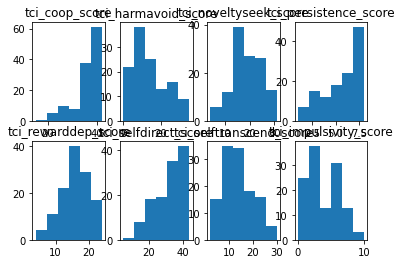

In [21]:

fag = plt.figure()
az1 = fag.add_subplot(2,4,1)
az2 = fag.add_subplot(2,4,2)
az3 = fag.add_subplot(2,4,3)
az4 = fag.add_subplot(2,4,4)
az5 = fag.add_subplot(2,4,5)
az6 = fag.add_subplot(2,4,6)
az7 = fag.add_subplot(2,4,7)
az8 = fag.add_subplot(2,4,8)
az1.title.set_text('tci_coop_score')
az2.title.set_text('tci_harmavoid_score')
az3.title.set_text('tci_noveltyseek_score')
az4.title.set_text('tci_persistence_score')
az5.title.set_text('tci_rewarddep_score')
az6.title.set_text('tci_selfdirect_score')
az7.title.set_text('tci_selftranscend_score')
az8.title.set_text('tci_impulsivity_score')
az1.hist(demo_net_spd.tci_coop_score,bins = 6)
az2.hist(demo_net_spd.tci_harmavoid_score,bins = 6)
az3.hist(demo_net_spd.tci_noveltyseek_score,bins = 6)
az4.hist(demo_net_spd.tci_persistence_score,bins = 6)
az5.hist(demo_net_spd.tci_rewarddep_score,bins = 6)
az6.hist(demo_net_spd.tci_selfdirect_score,bins = 6)
az7.hist(demo_net_spd.tci_selftranscend_score,bins = 6)
az8.hist(demo_net_spd.tci_impulsivity_score,bins = 6)
plt.show()


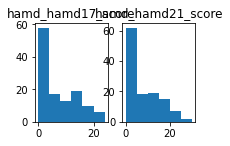

In [22]:
fog = plt.figure()
az11 = fog.add_subplot(2,4,1)
az12 = fog.add_subplot(2,4,2)
az11.title.set_text('hamd_hamd17_score')
az12.title.set_text('hamd_hamd21_score')
az11.hist(demo_net_spd.hamd_hamd17_score,bins = 6)
az12.hist(demo_net_spd.hamd_hamd21_score,bins = 6)

plt.show()

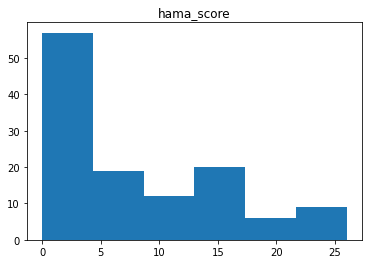

In [23]:
plt.hist(demo_net_spd.hama_score,bins = 6)
plt.title("hama_score")
plt.show()



In [24]:
#some statistics

print(demo_net_spd.describe(include='all'))

       batch         age     sex Diag      hs_CRP  shaps_score  psqi_score  \
count    123  123.000000     123  123  123.000000   123.000000  123.000000   
unique     4         NaN       2    2         NaN          NaN         NaN   
top      2nd         NaN  Female   HC         NaN          NaN         NaN   
freq      33         NaN      67   74         NaN          NaN         NaN   
mean     NaN   32.373984     NaN  NaN    3.025935    22.845528    6.894309   
std      NaN   10.812408     NaN  NaN    4.654423     7.220227    3.819306   
min      NaN   18.000000     NaN  NaN    0.000000    14.000000    0.000000   
25%      NaN   24.000000     NaN  NaN    0.500000    16.000000    4.000000   
50%      NaN   28.000000     NaN  NaN    1.300000    23.000000    6.000000   
75%      NaN   43.000000     NaN  NaN    3.350000    28.000000    9.000000   
max      NaN   55.000000     NaN  NaN   31.500000    42.000000   17.000000   

        ctq_denial_score  ctq_emoabuse_score  ctq_emoneglect_sc